In [1]:
# Import pandas for data analysis
# Import matplotlib.pyplot to help us draw/save images
# Import matplotlib and change the pdf-saving settings
# Tell the notebook to display images in the notebook

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

# Social Spending Barchart

In [141]:
spendings = pd.read_csv("data/social-spending.csv")

In [143]:
spendings["Country"] = spendings["Country"].astype(str)
spendings["Social Spending"] = spendings["Social Spending"].str.replace("%", "")
spendings["Social Spending"]= spendings["Social Spending"].astype(float)

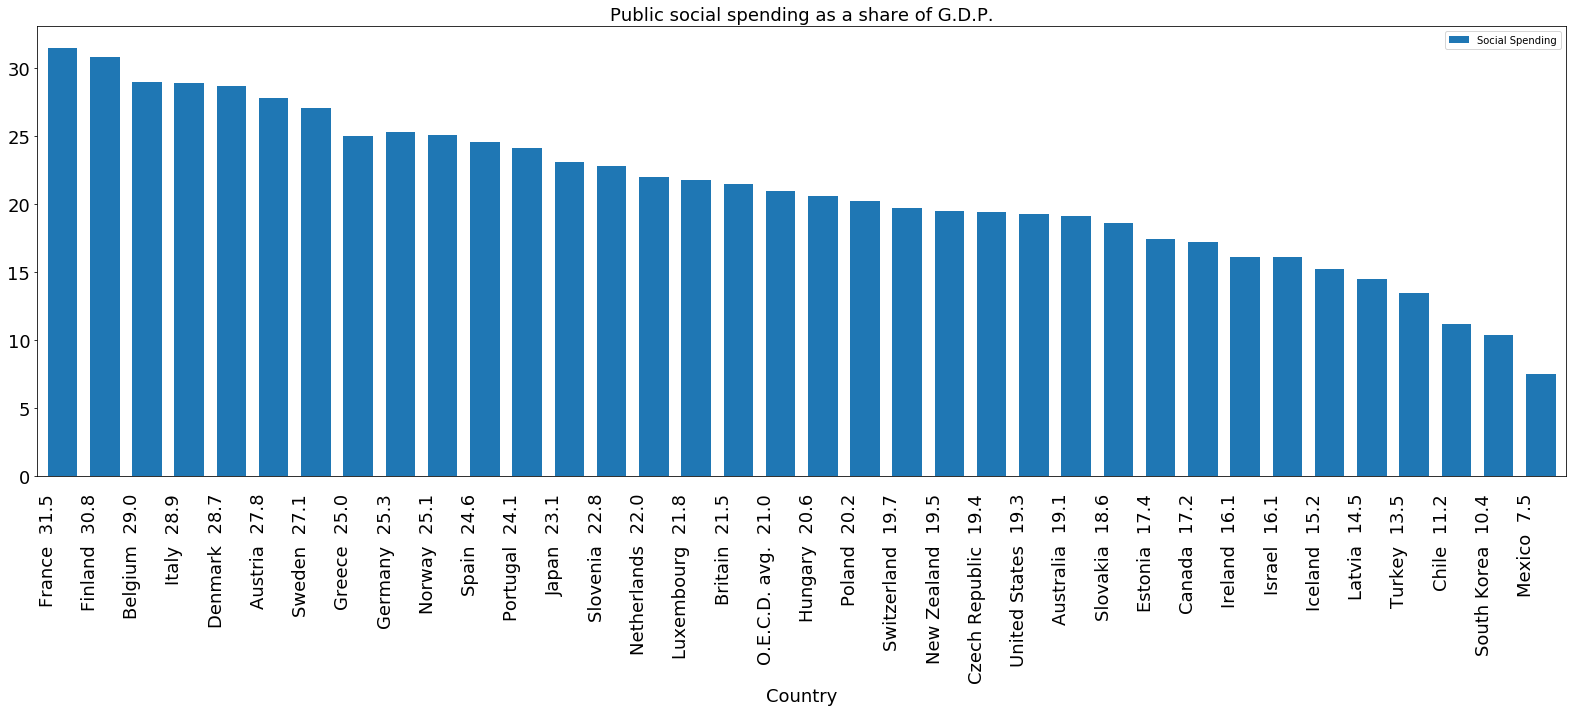

In [461]:
ax = spendings.plot(kind='bar', x='Country', y='Social Spending', figsize= (22,10), width=0.7, align="edge", title="Public social spending as a share of G.D.P.")
# Strip ticks
plt.tick_params(axis='x', which='both',bottom='off', top='off')
# Change fontsize of labels
for label_size in ( [ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    label_size.set_fontsize(18)
ax.title.set_size(18)
# Renaming the ticks    
my_ticks = []    
for tick in range(0, len(spendings["Country"])):
    my_ticks.append(spendings["Country"][tick] + "  "+ str(spendings["Social Spending"][tick])+"  ")
ax.set_xticklabels(my_ticks)
# Saving
plt.tight_layout()
plt.savefig("Social_spending.pdf", transparent=True)

# 2018 election cycle


In [414]:
poll = pd.read_csv("data/generic_poll_lead.csv")

,year,lead,in_power
0,2018,13.4,no
1,2016,1.2,yes
2,2014,3.0,yes
3,2012,1.5,no
4,2010,0.4,no
5,2008,11.0,no
6,2006,10.2,no
7,2004,2.5,no
8,2002,0.2,yes
9,2000,4.8,yes


In [415]:
poll["lead"] = poll["lead"].astype(float)

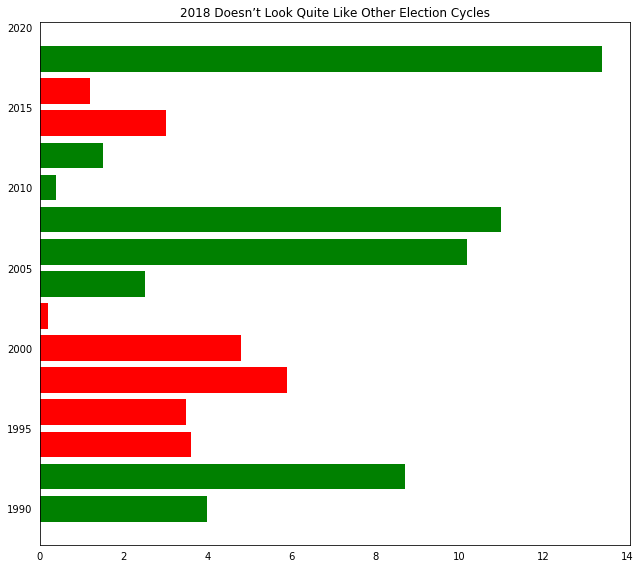

In [450]:
# Build the plot
fig,ax = plt.subplots(figsize=(9,8))
# Calculate the colors
colors = {
  'yes': 'red', 
  'no': 'green'
}
color_list = [colors[category] for category in poll['in_power']]
# Use matplotlib directly
ax.barh(poll['year'], poll['lead'], 1.6, color=color_list)
# Manage ticks
plt.tick_params(axis='x', which='both',bottom='off', top='off')
plt.tick_params(axis='y', which='both', left='off', right='off')
# Set title
ax.set_title("2018 Doesn’t Look Quite Like Other Election Cycles")
# Saving
plt.tight_layout()
plt.savefig("Polls.pdf", transparent=True)

# Incumbents

In [420]:
incumbents = pd.read_csv("data/cook_pvi.csv")
incumbents["pct_defeated"] = incumbents["pct_defeated"].astype(int)

In [424]:
# Making a new column with the pct_won
pct_won = []
for pct in incumbents['pct_defeated']:
    difference = 100 - pct
    pct_won.append(difference)
incumbents["pct_won"] = pct_won

[24, 37, 39, 65, 75, 82, 93, 100]


,cook_pvi,pct_defeated,pct_won
0,C+7 or greater,76,24
1,C+3 to C+7,63,37
2,C+1 to C+3,61,39
3,I+1 to C+1,35,65
4,I+1 to I+3,25,75
5,I+3 to I+5,18,82
6,I+5 to I+10,7,93
7,I+10 or greater,0,100


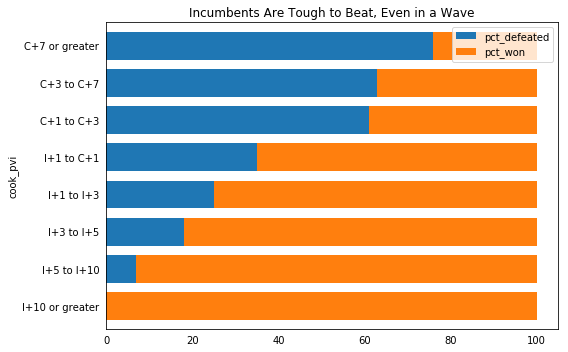

In [449]:
# Graphing
ax = incumbents.plot(kind='barh', x='cook_pvi', y=['pct_defeated', 'pct_won'], stacked=True, figsize=(8,5), width=0.75)
plt.gca().invert_yaxis()
# Manage ticks
plt.tick_params(axis='x', which='both',bottom='off', top='off')
plt.tick_params(axis='y', which='both', left='off', right='off')
# Set title
ax.set_title("Incumbents Are Tough to Beat, Even in a Wave")
# Saving
plt.tight_layout()
plt.savefig("Incumbents.pdf", transparent=True)